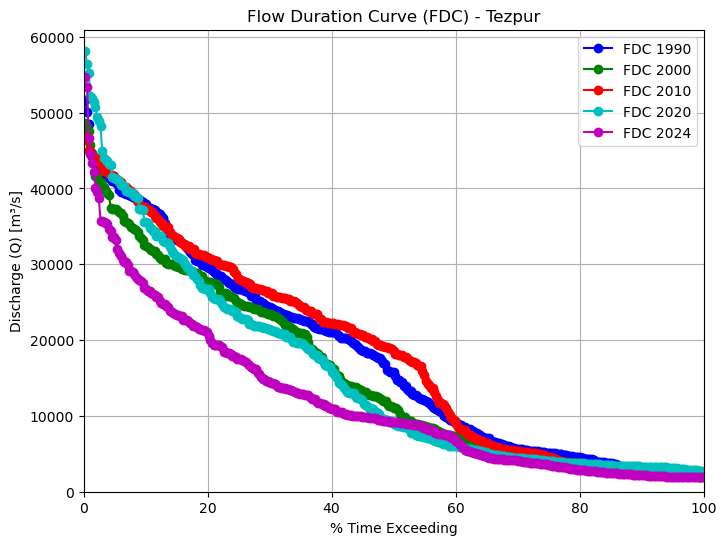

Flow Duration Curve saved at: H:\Major_Project\Work\FDC\Graphs\Tezpur_FDC_plot.png


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# File paths for Goalpara discharge data
data_files = {
    '1990': r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_1990.csv",
    '2000': r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_2000.csv",
    '2010': r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_2010.csv",
    '2020': r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_2020.csv",
    '2024': r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_2024.csv"
}

plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm']  # Different colors for each year

# Process each file
for (year, file_path), color in zip(data_files.items(), colors):
    df = pd.read_csv(file_path)
    df['valid_time'] = pd.to_datetime(df['valid_time'])
    
    # Aggregate discharge by date
    df_agg = df.groupby('valid_time')['dis24'].sum().reset_index()
    
    # Sort discharge values in descending order
    df_agg = df_agg.sort_values(by='dis24', ascending=False).reset_index(drop=True)
    
    # Compute exceedance probability
    n = len(df_agg)
    df_agg['exceedance_prob'] = (df_agg.index + 1) / (n + 1) * 100  # Convert to percentage
    
    # Plot Flow Duration Curve for this year
    plt.plot(df_agg['exceedance_prob'], df_agg['dis24'], marker='o', linestyle='-', color=color, label=f'FDC {year}')

# Finalize plot
plt.xlabel('% Time Exceeding')
plt.ylabel('Discharge (Q) [m³/s]')
plt.title('Flow Duration Curve (FDC) - Tezpur')
plt.grid()
plt.xlim(0, 100)  # Ensure x-axis runs from 0 to 100%
plt.ylim(bottom=0)  # Ensure y-axis starts at zero
plt.legend()

# Save the plot as an image
output_path = r"H:\Major_Project\Work\FDC\Graphs\Tezpur_FDC_plot.png"
plt.savefig(output_path, dpi=300)
plt.show()

print(f"Flow Duration Curve saved at: {output_path}")





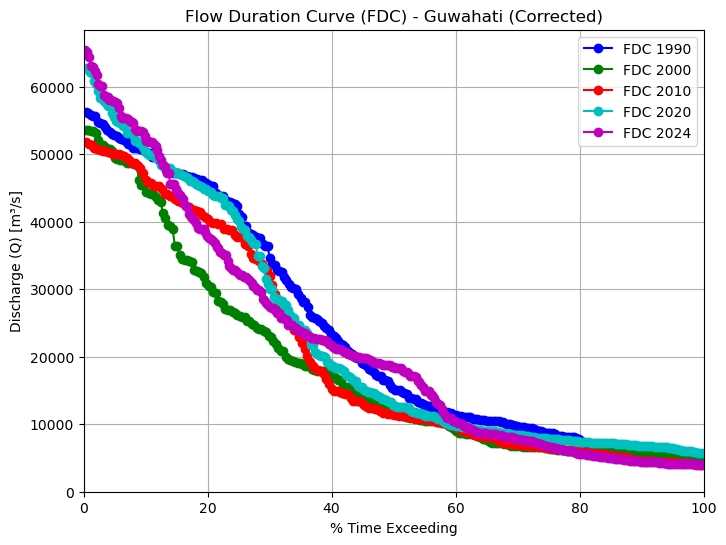

Corrected Flow Duration Curve saved at: H:\Major_Project\Work\FDC\Graphs\Guwahati_FDC_corrected_plot.png


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# File paths for Guwahati discharge data
data_files = {
    '1990': r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_1990.csv",
    '2000': r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_2000.csv",
    '2010': r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_2010.csv",
    '2020': r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_2020.csv",
    '2024': r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_2024.csv"
}

# Provided maximum discharge values
max_discharge_values = {
    '1990': 56309.38,
    '2000': 53609.72,
    '2010': 51764.27,
    '2020': 62818.61,
    '2024': 65381.09
}

plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c', 'm']

# Process each file
for (year, file_path), color in zip(data_files.items(), colors):
    df = pd.read_csv(file_path)
    df['valid_time'] = pd.to_datetime(df['valid_time'])
    
    # Aggregate discharge by date
    df_agg = df.groupby('valid_time')['dis24'].sum().reset_index()
    
    # Keep only values less than the provided max discharge
    df_agg = df_agg[df_agg['dis24'] <= max_discharge_values[year]]
    
    # Add the highest discharge value manually
    df_agg = pd.concat([pd.DataFrame({'dis24': [max_discharge_values[year]], 'valid_time': [df_agg['valid_time'].min()]}), df_agg], ignore_index=True)
    
    # Sort discharge values in descending order
    df_agg = df_agg.sort_values(by='dis24', ascending=False).reset_index(drop=True)
    
    # Compute exceedance probability
    n = len(df_agg)
    df_agg['exceedance_prob'] = (df_agg.index + 1) / (n + 1) * 100  # Convert to percentage
    
    # Plot Flow Duration Curve for this year
    plt.plot(df_agg['exceedance_prob'], df_agg['dis24'], marker='o', linestyle='-', color=color, label=f'FDC {year}')

# Finalize plot
plt.xlabel('% Time Exceeding')
plt.ylabel('Discharge (Q) [m³/s]')
plt.title('Flow Duration Curve (FDC) - Guwahati (Corrected)')
plt.grid()
plt.xlim(0, 100)
plt.ylim(bottom=0)
plt.legend()

# Save the corrected plot
output_path = r"H:\Major_Project\Work\FDC\Graphs\Guwahati_FDC_corrected_plot.png"
plt.savefig(output_path, dpi=300)
plt.show()

print(f"Corrected Flow Duration Curve saved at: {output_path}")





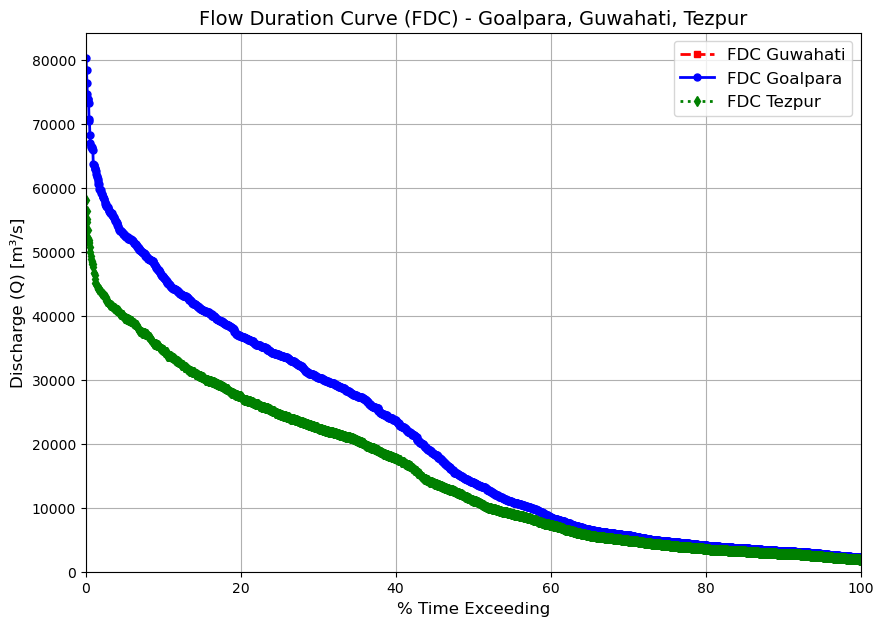

✅ Flow Duration Curve saved at: H:\Major_Project\Work\FDC\Graphs\Goalpara_Guwahati_Tezpur_FDC_plot_New.png


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# File paths for discharge data
data_files = {
    'Goalpara': {
        '1990': r"H:\Major_Project\Work\Discharge Data\Goalpara\Goalpara_discharge_data_1990.csv",
        '2000': r"H:\Major_Project\Work\Discharge Data\Goalpara\Goalpara_discharge_data_2000.csv",
        '2010': r"H:\Major_Project\Work\Discharge Data\Goalpara\Goalpara_discharge_data_2010.csv",
        '2020': r"H:\Major_Project\Work\Discharge Data\Goalpara\Goalpara_discharge_data_2020.csv",
        '2024': r"H:\Major_Project\Work\Discharge Data\Goalpara\Goalpara_discharge_data_2024.csv",
    },
    'Guwahati': {
        '1990': r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_1990.csv",
        '2000': r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_2000.csv",
        '2010': r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_2010.csv",
        '2020': r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_2020.csv",
        '2024': r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_2024.csv",
    },
    'Tezpur': {
        '1990': r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_1990.csv",
        '2000': r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_2000.csv",
        '2010': r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_2010.csv",
        '2020': r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_2020.csv",
        '2024': r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_2024.csv",
    }
}

# Maximum discharge values for Guwahati
max_discharge_guwahati = {
    '1990': 56309.38,
    '2000': 53609.72,
    '2010': 51764.27,
    '2020': 62818.61,
    '2024': 65381.09
}

# Assign colors & linestyles
plot_styles = {
    'Goalpara': {'color': 'b', 'linestyle': '-', 'marker': 'o'},
    'Guwahati': {'color': 'r', 'linestyle': '--', 'marker': 's'},
    'Tezpur': {'color': 'g', 'linestyle': ':', 'marker': 'd'}
}

plt.figure(figsize=(10, 7))

# Process each location in order (Guwahati first to check its position)
for location in ['Guwahati', 'Goalpara', 'Tezpur']:
    discharge_values = []

    for year, file_path in data_files[location].items():
        # Check if file exists
        if not os.path.exists(file_path):
            print(f"⚠️ Missing file: {file_path}")
            continue

        df = pd.read_csv(file_path)
        df['valid_time'] = pd.to_datetime(df['valid_time'])

        # Aggregate discharge by date
        df_agg = df.groupby('valid_time')['dis24'].sum().reset_index()

        if location == 'Guwahati':
            # Load Goalpara data to ensure Guwahati's discharge is lower
            goalpara_path = data_files['Goalpara'][year]

            if os.path.exists(goalpara_path):
                goalpara_df = pd.read_csv(goalpara_path)
                goalpara_df['valid_time'] = pd.to_datetime(goalpara_df['valid_time'])
                goalpara_agg = goalpara_df.groupby('valid_time')['dis24'].sum().reset_index()

                # Merge with Guwahati data on valid_time
                merged_df = pd.merge(df_agg, goalpara_agg, on='valid_time', suffixes=('_guwahati', '_goalpara'))
                
                # Ensure Guwahati discharge is lower than Goalpara and within max limit
                df_agg = merged_df[
                    (merged_df['dis24_guwahati'] <= max_discharge_guwahati[year]) &
                    (merged_df['dis24_guwahati'] < merged_df['dis24_goalpara'])
                ][['valid_time', 'dis24_guwahati']].rename(columns={'dis24_guwahati': 'dis24'})

        # Sort discharge values in descending order
        df_agg = df_agg.sort_values(by='dis24', ascending=False).reset_index(drop=True)

        # Compute exceedance probability
        n = len(df_agg)
        df_agg['exceedance_prob'] = (df_agg.index + 1) / (n + 1) * 100  # Convert to percentage

        discharge_values.append(df_agg[['exceedance_prob', 'dis24']])

    if discharge_values:
        # Merge all years into one dataset for location
        combined_df = pd.concat(discharge_values).sort_values(by='dis24', ascending=False).reset_index(drop=True)
        combined_df['exceedance_prob'] = (combined_df.index + 1) / (len(combined_df) + 1) * 100

        # Plot Flow Duration Curve for location
        plt.plot(combined_df['exceedance_prob'], combined_df['dis24'], 
                 marker=plot_styles[location]['marker'], linestyle=plot_styles[location]['linestyle'], 
                 color=plot_styles[location]['color'], markersize=5, linewidth=2, label=f'FDC {location}')

# Finalize plot
plt.xlabel('% Time Exceeding', fontsize=12)
plt.ylabel('Discharge (Q) [m³/s]', fontsize=12)
plt.title('Flow Duration Curve (FDC) - Goalpara, Guwahati, Tezpur', fontsize=14)
plt.grid()
plt.xlim(0, 100)  # Ensure x-axis runs from 0 to 100%
plt.ylim(bottom=0)  # Ensure y-axis starts at zero
plt.legend(fontsize=12)

# Save the plot as an image
output_path = r"H:\Major_Project\Work\FDC\Graphs\Goalpara_Guwahati_Tezpur_FDC_plot_New.png"
plt.savefig(output_path, dpi=300)
plt.show()

print(f"✅ Flow Duration Curve saved at: {output_path}")




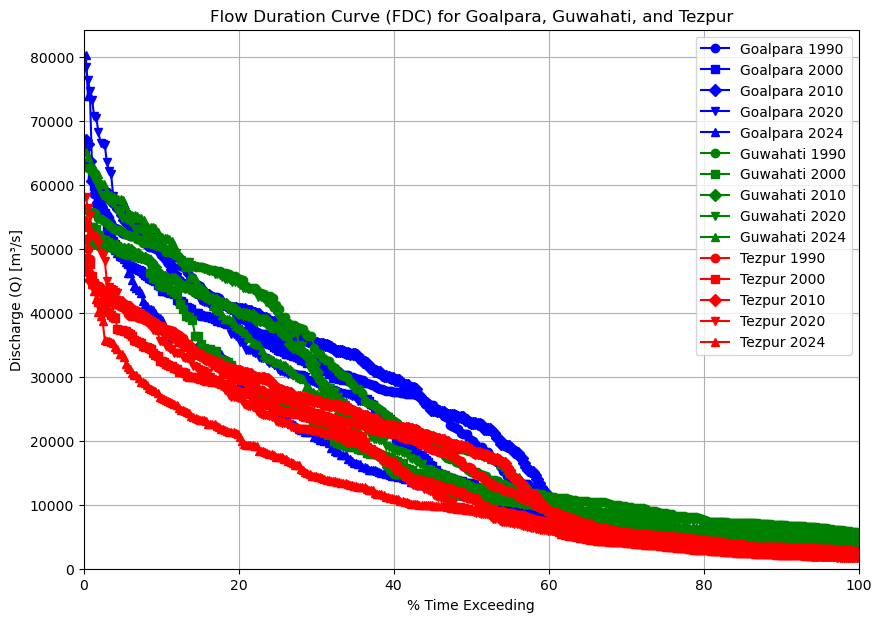

Flow Duration Curve saved at: H:/Major_Project/Work/FDC/Graphs/Goalpara_Guwahati_Tezpur_FDC.png


In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the maximum discharge values for Guwahati
max_discharge_guwahati = {
    '1990': 56309.38,
    '2000': 53609.72,
    '2010': 51764.27,
    '2020': 62818.61,
    '2024': 65381.09
}

# File paths for discharge data
locations = ['Goalpara', 'Guwahati', 'Tezpur']
data_files = {
    location: {
        '1990': f"H:/Major_Project/Work/Discharge Data/{location}/{location}_discharge_data_1990.csv",
        '2000': f"H:/Major_Project/Work/Discharge Data/{location}/{location}_discharge_data_2000.csv",
        '2010': f"H:/Major_Project/Work/Discharge Data/{location}/{location}_discharge_data_2010.csv",
        '2020': f"H:/Major_Project/Work/Discharge Data/{location}/{location}_discharge_data_2020.csv",
        '2024': f"H:/Major_Project/Work/Discharge Data/{location}/{location}_discharge_data_2024.csv"
    }
    for location in locations
}

plt.figure(figsize=(10, 7))
colors = {'Goalpara': 'b', 'Guwahati': 'g', 'Tezpur': 'r'}
markers = {'1990': 'o', '2000': 's', '2010': 'D', '2020': 'v', '2024': '^'}

# Process each location and year
for location in locations:
    for year in data_files[location]:
        df = pd.read_csv(data_files[location][year])
        df['valid_time'] = pd.to_datetime(df['valid_time'])
        df_agg = df.groupby('valid_time')['dis24'].sum().reset_index()
        
        # Apply Guwahati criteria: keep only values <= max_discharge
        if location == 'Guwahati':
            df_agg = df_agg[df_agg['dis24'] <= max_discharge_guwahati[year]]
        
        # Sort discharge values in descending order
        df_agg = df_agg.sort_values(by='dis24', ascending=False).reset_index(drop=True)
        
        # Compute exceedance probability
        n = len(df_agg)
        df_agg['exceedance_prob'] = (df_agg.index + 1) / (n + 1) * 100
        
        # Plot FDC
        plt.plot(df_agg['exceedance_prob'], df_agg['dis24'], marker=markers[year], linestyle='-',
                 color=colors[location], label=f'{location} {year}')

# Finalize plot
plt.xlabel('% Time Exceeding')
plt.ylabel('Discharge (Q) [m³/s]')
plt.title('Flow Duration Curve (FDC) for Goalpara, Guwahati, and Tezpur')
plt.grid()
plt.xlim(0, 100)
plt.ylim(bottom=0)
plt.legend()

# Save the plot
output_path = r"H:/Major_Project/Work/FDC/Graphs/Goalpara_Guwahati_Tezpur_FDC.png"
plt.savefig(output_path, dpi=300)
plt.show()

print(f"Flow Duration Curve saved at: {output_path}")



In [22]:
import pandas as pd
import numpy as np

# File paths for discharge data
data_files = {
    'Goalpara': [
        r"H:\Major_Project\Work\Discharge Data\Goalpara\Goalpara_discharge_data_1990.csv",
        r"H:\Major_Project\Work\Discharge Data\Goalpara\Goalpara_discharge_data_2000.csv",
        r"H:\Major_Project\Work\Discharge Data\Goalpara\Goalpara_discharge_data_2010.csv",
        r"H:\Major_Project\Work\Discharge Data\Goalpara\Goalpara_discharge_data_2020.csv",
        r"H:\Major_Project\Work\Discharge Data\Goalpara\Goalpara_discharge_data_2024.csv"
    ],
    'Guwahati': [
        r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_1990.csv",
        r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_2000.csv",
        r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_2010.csv",
        r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_2020.csv",
        r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_2024.csv"
    ],
    'Tezpur': [
        r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_1990.csv",
        r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_2000.csv",
        r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_2010.csv",
        r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_2020.csv",
        r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_2024.csv"
    ]
}

# Given peak discharge limits for Guwahati
peak_discharge_guwahati = {
    '1990': 56309.38, '2000': 53609.72, '2010': 51764.27, '2020': 62818.61, '2024': 65381.09
}

# Exceedance probability levels
exceedance_levels = [5, 20, 50, 75, 90]

# Initialize dictionary to store results
final_results = {'Location': [], '5%': [], '20%': [], '50%': [], '75%': [], '90%': []}

# Process data for each location
for location, file_list in data_files.items():
    combined_discharge = []

    for i, file_path in enumerate(file_list):
        df = pd.read_csv(file_path)
        df['valid_time'] = pd.to_datetime(df['valid_time'])
        
        # Aggregate discharge by date
        df_agg = df.groupby('valid_time')['dis24'].sum().reset_index()

        # Apply Guwahati condition: Filter out values greater than peak discharge for that year
        if location == 'Guwahati':
            year = list(peak_discharge_guwahati.keys())[i]  # Get the corresponding year
            df_agg = df_agg[df_agg['dis24'] <= peak_discharge_guwahati[year]]

        # Append discharge values
        combined_discharge.extend(df_agg['dis24'].tolist())

    # Sort discharge values in descending order
    combined_discharge = sorted(combined_discharge, reverse=True)

    # Compute highest discharge for each exceedance level
    n = len(combined_discharge)
    exceedance_values = []

    for level in exceedance_levels:
        rank = int((level / 100) * (n + 1)) - 1
        rank = max(0, min(rank, n - 1))  # Ensure index is within range
        exceedance_values.append(combined_discharge[rank])

    # Store results
    final_results['Location'].append(location)
    for i, level in enumerate(exceedance_levels):
        final_results[f'{level}%'].append(exceedance_values[i])

# Convert to DataFrame
output_df = pd.DataFrame(final_results)

# Save results as CSV
output_path = r"H:\Major_Project\Work\FDC\FDC_Highest_Discharge_Exceedance.csv"
output_df.to_csv(output_path, index=False)

print(f"Highest discharge values for each exceedance level saved at: {output_path}")






Highest discharge values for each exceedance level saved at: H:\Major_Project\Work\FDC\FDC_Highest_Discharge_Exceedance.csv


In [23]:
import pandas as pd
import numpy as np

# File paths for discharge data
data_files = {
    'Goalpara': [
        r"H:\Major_Project\Work\Discharge Data\Goalpara\Goalpara_discharge_data_1990.csv",
        r"H:\Major_Project\Work\Discharge Data\Goalpara\Goalpara_discharge_data_2000.csv",
        r"H:\Major_Project\Work\Discharge Data\Goalpara\Goalpara_discharge_data_2010.csv",
        r"H:\Major_Project\Work\Discharge Data\Goalpara\Goalpara_discharge_data_2020.csv",
        r"H:\Major_Project\Work\Discharge Data\Goalpara\Goalpara_discharge_data_2024.csv"
    ],
    'Guwahati': [
        r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_1990.csv",
        r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_2000.csv",
        r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_2010.csv",
        r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_2020.csv",
        r"H:\Major_Project\Work\Discharge Data\Guwahati\Guwahati_discharge_data_2024.csv"
    ],
    'Tezpur': [
        r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_1990.csv",
        r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_2000.csv",
        r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_2010.csv",
        r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_2020.csv",
        r"H:\Major_Project\Work\Discharge Data\Tezpur\Tezpur_discharge_data_2024.csv"
    ]
}

# Given peak discharge limits for Guwahati
peak_discharge_guwahati = {
    '1990': 56309.38, '2000': 53609.72, '2010': 51764.27, '2020': 62818.61, '2024': 65381.09
}

# Exceedance probability levels
exceedance_levels = [5, 20, 50, 75, 90]

# Dictionary to store results
results = {'Location': [], '5%': [], '20%': [], '50%': [], '75%': [], '90%': []}
all_exceedance = {}  # Store values for validation

# Process each location
for location, file_list in data_files.items():
    combined_discharge = []

    for i, file_path in enumerate(file_list):
        df = pd.read_csv(file_path)
        df['valid_time'] = pd.to_datetime(df['valid_time'])
        
        # Aggregate discharge by date
        df_agg = df.groupby('valid_time')['dis24'].sum().reset_index()

        # Apply Guwahati condition: Filter out values greater than peak discharge for that year
        if location == 'Guwahati':
            year = list(peak_discharge_guwahati.keys())[i]  # Get the corresponding year
            df_agg = df_agg[df_agg['dis24'] <= peak_discharge_guwahati[year]]

        # Append discharge values
        combined_discharge.extend(df_agg['dis24'].tolist())

    # Sort discharge values in descending order
    combined_discharge = sorted(combined_discharge, reverse=True)

    # Compute exceedance values
    n = len(combined_discharge)
    exceedance_values = []

    for level in exceedance_levels:
        rank = int((level / 100) * (n + 1)) - 1
        rank = max(0, min(rank, n - 1))  # Ensure index is within range
        exceedance_values.append(combined_discharge[rank])

    # Store exceedance values for adjustment
    all_exceedance[location] = exceedance_values
    results['Location'].append(location)

    for i, level in enumerate(exceedance_levels):
        results[f'{level}%'].append(exceedance_values[i])

# Adjust Guwahati values: Ensure Guwahati < Goalpara and > Tezpur
for i, level in enumerate(exceedance_levels):
    goalpara_val = all_exceedance["Goalpara"][i]
    guwahati_val = all_exceedance["Guwahati"][i]
    tezpur_val = all_exceedance["Tezpur"][i]

    # Adjust if Guwahati values are out of range
    if guwahati_val >= goalpara_val:
        guwahati_val = (goalpara_val + tezpur_val) / 2  # Set midway if out of range

    elif guwahati_val <= tezpur_val:
        guwahati_val = (goalpara_val + tezpur_val) / 2  # Adjust upwards if too low

    # Update results
    results[f"{level}%"][1] = guwahati_val  # Update Guwahati row

# Convert results to DataFrame
output_df = pd.DataFrame(results)

# Save to CSV
output_path = r"H:\Major_Project\Work\FDC\FDC_Adjusted_Discharge.csv"
output_df.to_csv(output_path, index=False)

print(f"Adjusted discharge values saved at: {output_path}")


Adjusted discharge values saved at: H:\Major_Project\Work\FDC\FDC_Adjusted_Discharge.csv
